In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

import matplotlib.pyplot as plt
import numpy
import astrohack_projections
#numpy.random.seed(42)

# create crazy looking Gaussian for the 3D model
basevar = 0.5 * numpy.eye(3)

gal_model = astrohack_projections.galaxy_model_3d()
v = [3., 0., 0.]
gal_model.add_gaussian(1.0, numpy.array([0., -1., 0.]), basevar + numpy.outer(v,v))
v = [-1., 3., 0.]
gal_model.add_gaussian(1.0, numpy.array([2., 1., 0.]), basevar + numpy.outer(v,v))
v = [1., 3., 0.]
gal_model.add_gaussian(1.0, numpy.array([-2., 1., 0.]), basevar + numpy.outer(v,v))


In [2]:
album = astrohack_projections.album_and_model()
psf = astrohack_projections.mixture_of_gaussians(2)
psf.add_gaussian(1., numpy.array([0., 0.]), numpy.eye(2)*1.)

vmin = None

for i in xrange(32):
    image = astrohack_projections.image_and_model()
    alpha, beta, gamma = numpy.random.uniform(0.0, 360.0, size=3)
    intensity = numpy.random.uniform(100.0, 150.0)
    scale = 0.25 * numpy.exp(numpy.random.uniform())
    xshift = numpy.random.uniform(13., 16.)
    yshift = numpy.random.uniform(18., 21.)

    image = astrohack_projections.image_and_model()
    image.set_shape((30, 40))
    image.set_psf(psf)
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0}
    image.set_parameters(**kwargs)
    image.set_galaxy(gal_model)
    image.set_ivar(numpy.ones(image.get_shape()))
    image.construct_synthetic()
    image.set_data(image.get_synthetic() + numpy.random.normal(size=image.get_shape()) / numpy.sqrt(image.ivar))

    # save to album
    album.add_image(image)
print len(album)

32


In [6]:
def showme(album):
    plt.rcParams['figure.figsize'] = 20, 80
    plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}
    for i in xrange(len(album)):
        image = album.get_all_images()[i]
        plt.subplot(16, 4, 2*i+1)
        vmin = -5. / numpy.sqrt(numpy.median(image.get_ivar())) # assumes bg = 0
        vmax = -2. * vmin # assumes bg = 0
        plt.imshow(image.get_data(), vmin=vmin, vmax=vmax, **plot_kwargs)
        plt.colorbar()
        plt.subplot(16, 4, 2*i+2)
        plt.imshow(image.get_synthetic(), vmin=vmin, vmax=vmax, **plot_kwargs)
        plt.colorbar()

In [4]:
# INITIALIZATION BLOCK!
import scipy.optimize as op

galpar0 = numpy.array([1., 2., 0., 0., 1., 1., 1., 0., 0., 0.,
                       1., 0., 2., 0., 1., 1., 1., 0., 0., 0.,
                       1., 0., 0., 2., 1., 1., 1., 0., 0., 0.])
imgpar0 = (10., 30., 30., 0.1, 0.5, 14., 20., 0.)

print "album before", album(galpar0)
for image in album:
    print "image before", image(imgpar0)

album before 553727.339214
image before 11413.8735356
image before 60262.7833732
image before 44642.7854891
image before 23674.2666569
image before 10695.1744823
image before 10267.1016257
image before 11048.9576097
image before 81108.5453056
image before 12206.2601682
image before 7098.00369897
image before 67612.9921953
image before 20841.0398523
image before 5538.01924451
image before 44905.9700057
image before 14883.9551205
image before 8045.63327483
image before 25727.6591082
image before 11043.9024017
image before 13017.2520103
image before 36454.2376771
image before 13278.1956683
image before 25482.5842348
image before 8909.92744566
image before 6615.44053922
image before 30918.9124385
image before 23727.7123473
image before 11656.4559283
image before 30702.7458339
image before 33303.8498982
image before 49734.6967989
image before 8723.06254452
image before 27755.2955148


In [5]:
print "album before", album(galpar0)
result = op.minimize(album, galpar0, method="Powell")
print result
galpar = result['x']
print "album after", album(galpar)
showme(album)

album before 791297.292028
  status: 0
 success: True
   direc: array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
     

/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/scipy/optimize/optimize.py:1778: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/scipy/optimize/optimize.py:1779: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


ValueError: num must be 0 <= num <= 32, not 33

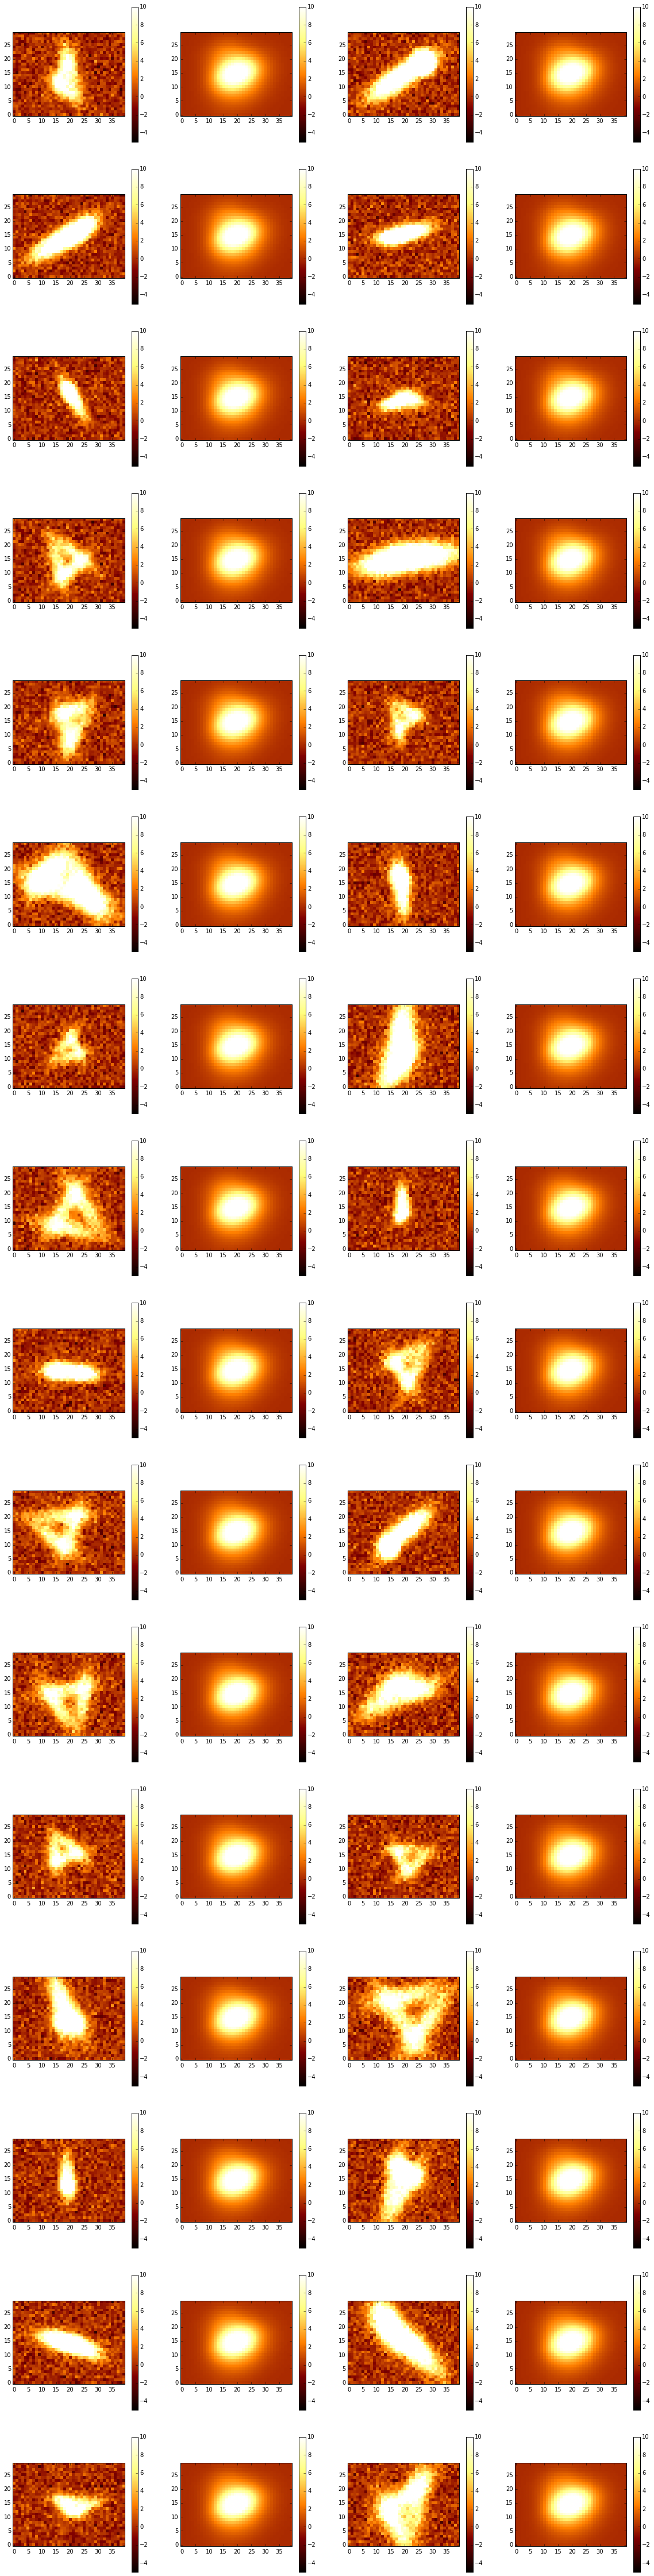

In [8]:
showme(album)

In [9]:
for image in album:
    imgpar0 = image.get_parameters_vector()
    print "image before", image(imgpar0)
    result = op.minimize(image, imgpar0)
    imgpar = result['x']
    print "image after", image(imgpar)
showme(album)

image before 5485.29355396
image after 2159.53381061
image before 32207.0333434
image after 8493.73768293
image before 16934.9828825
image after 2567.78906716
image before 8088.87324664
image after 1829.36869904
image before 8284.84746978
image after 1369.24644473
image before 5377.88847621
image after 1611.87859863
image before 4409.68906605
image after 2943.12301211
image before 37241.3290566
image after 2240.38781014
image before 4883.27615588
image after 2850.91021652
image before 4831.15492945
image after 1954.89413717
image before 38168.4135658
image after 11275.0647288
image before 9701.70181619
image after 2080.13028159
image before 6043.12589397
image after 1901.86621959
image before 17835.5337148
image after 2475.93113565
image before 7004.78484882
image after 4086.72110991
image before 7493.19485603
image after 1653.34405398
image before 10375.9039956
image after 2585.11199268
image before 4683.30996762
image after 2957.80783164
image before 6093.68276662
image after 3471.69

album before 104125.766238
  status: 0
 success: True
   direc: array([[  2.12226576e+01,  -1.61274926e-02,  -7.77878765e-03,
         -5.08012049e-03,   7.25172878e-02,   1.02321080e-02,
          8.91326212e-03,   5.21023311e-02,  -3.20350882e-02,
         -2.18443063e-02,   3.15389694e+01,  -3.67811325e-02,
         -3.15615068e-02,   1.09153389e-02,  -6.77735760e-02,
          2.05425586e-01,  -2.95456740e-02,   9.58634422e-02,
          6.33203597e-02,  -3.92655948e-02,  -1.60697013e+01,
          3.60224212e-02,  -2.19956050e-02,   2.14027849e-02,
          9.05315168e-02,   2.15603659e-02,   1.75148934e-01,
         -5.95870589e-02,   1.17194005e-01,  -3.39527327e-02],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
     

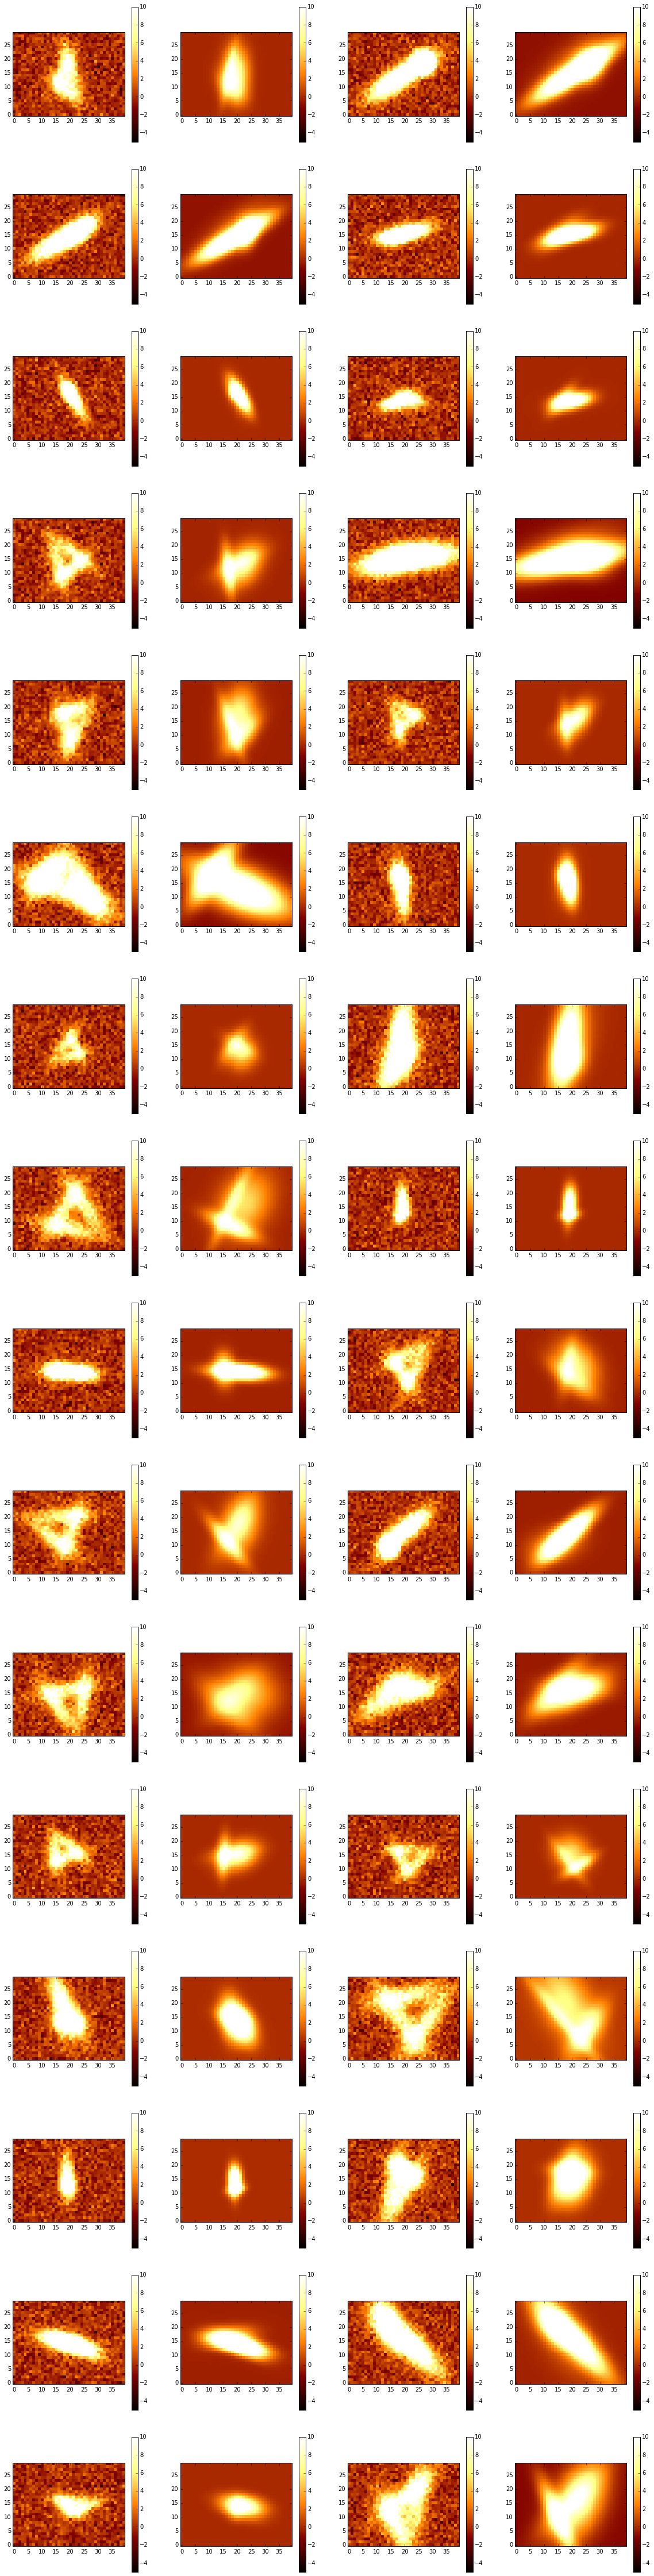

In [10]:
galpar0 = album.galaxy.get_parameters_vector()
print "album before", album(galpar0)
result = op.minimize(album, galpar0, method="Powell")
print result
galpar = result['x']
print "album after", album(galpar)
showme(album)

image before 1857.97875619
image after 1762.89145067
image before 5303.12787148
image after 4712.30226098
image before 1713.71452211
image after 1496.83234338
image before 1604.09642457
image after 1546.85376276
image before 1334.25603002
image after 1257.44396975
image before 1634.60042398
image after 1467.21940016
image before 2979.22258048
image after 2820.44667837
image before 3229.0861408
image after 1650.46220665
image before 2532.63854014
image after 2420.91292204
image before 1832.69455027
image after 1777.81582609
image before 6396.67320966
image after 5677.32292233
image before 1928.68335972
image after 1649.89903879
image before 1796.18646714
image after 1731.37685853
image before 2499.67028801
image after 2164.27923442
image before 3228.39968538
image after 2721.58682744
image before 1330.91906388
image after 1284.20196397
image before 1861.3080219
image after 1720.98123441
image before 3174.4307424
image after 2286.27553814
image before 3290.22144289
image after 2928.53447

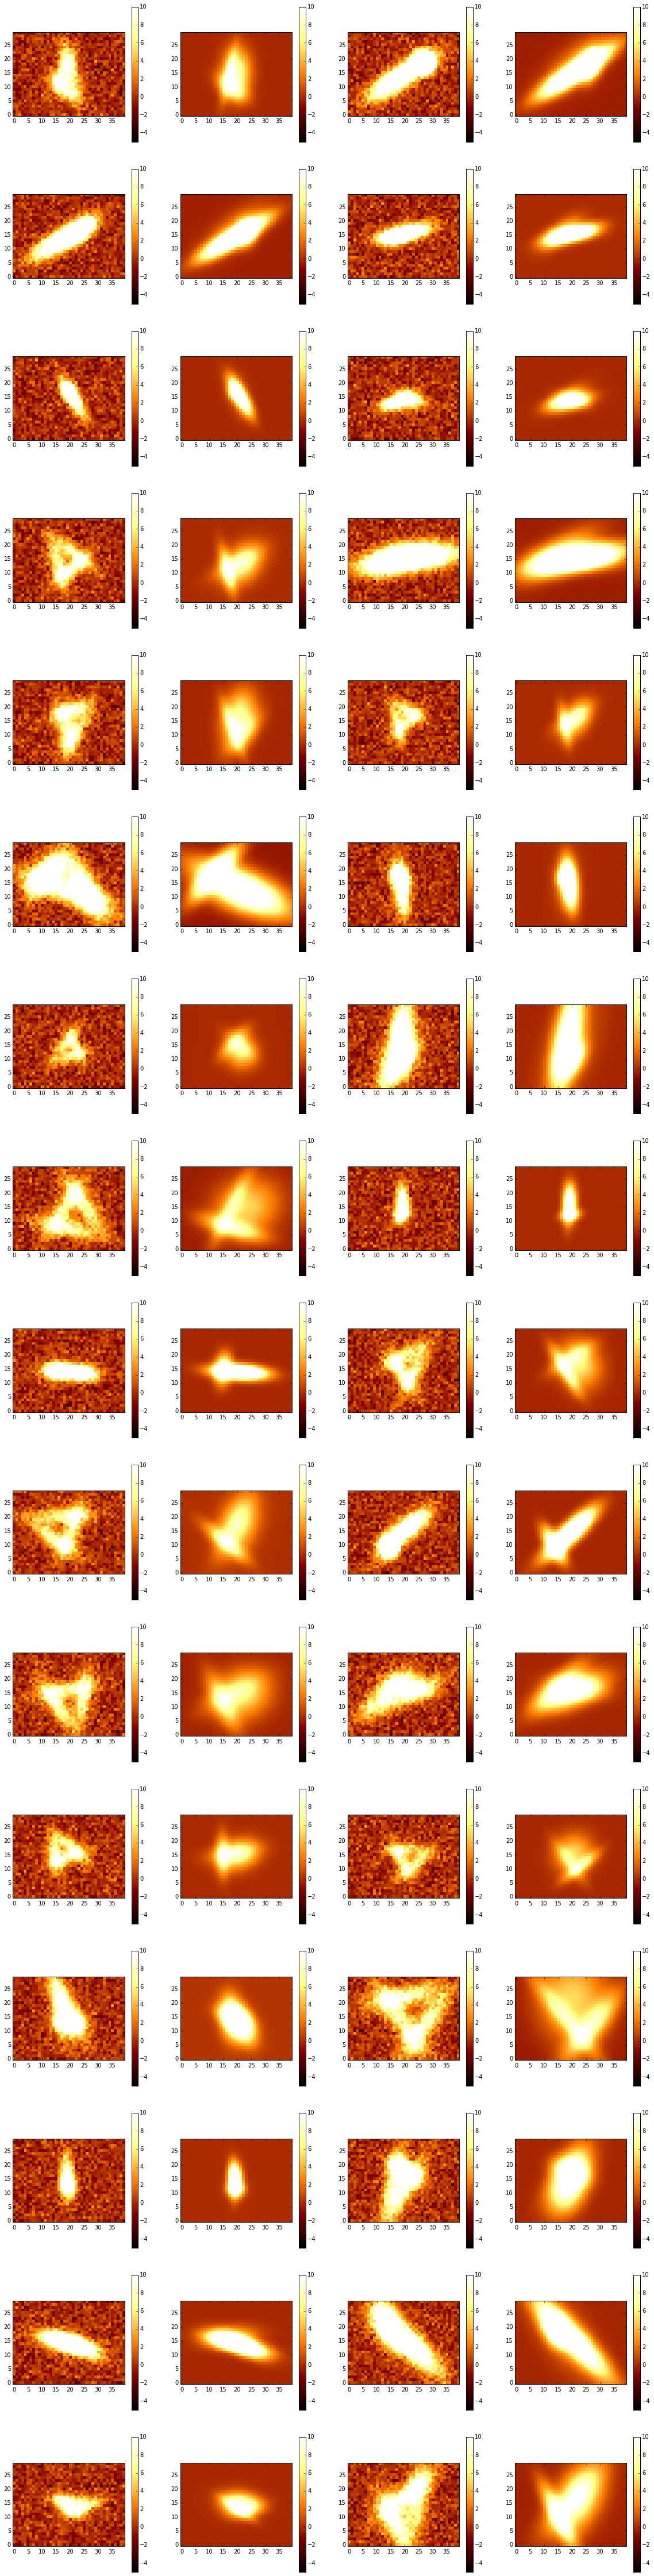

In [11]:
for image in album:
    imgpar0 = image.get_parameters_vector()
    print "image before", image(imgpar0)
    result = op.minimize(image, imgpar0)
    imgpar = result['x']
    print "image after", image(imgpar)
showme(album)

album before 74765.3124723
album after 70229.6773781


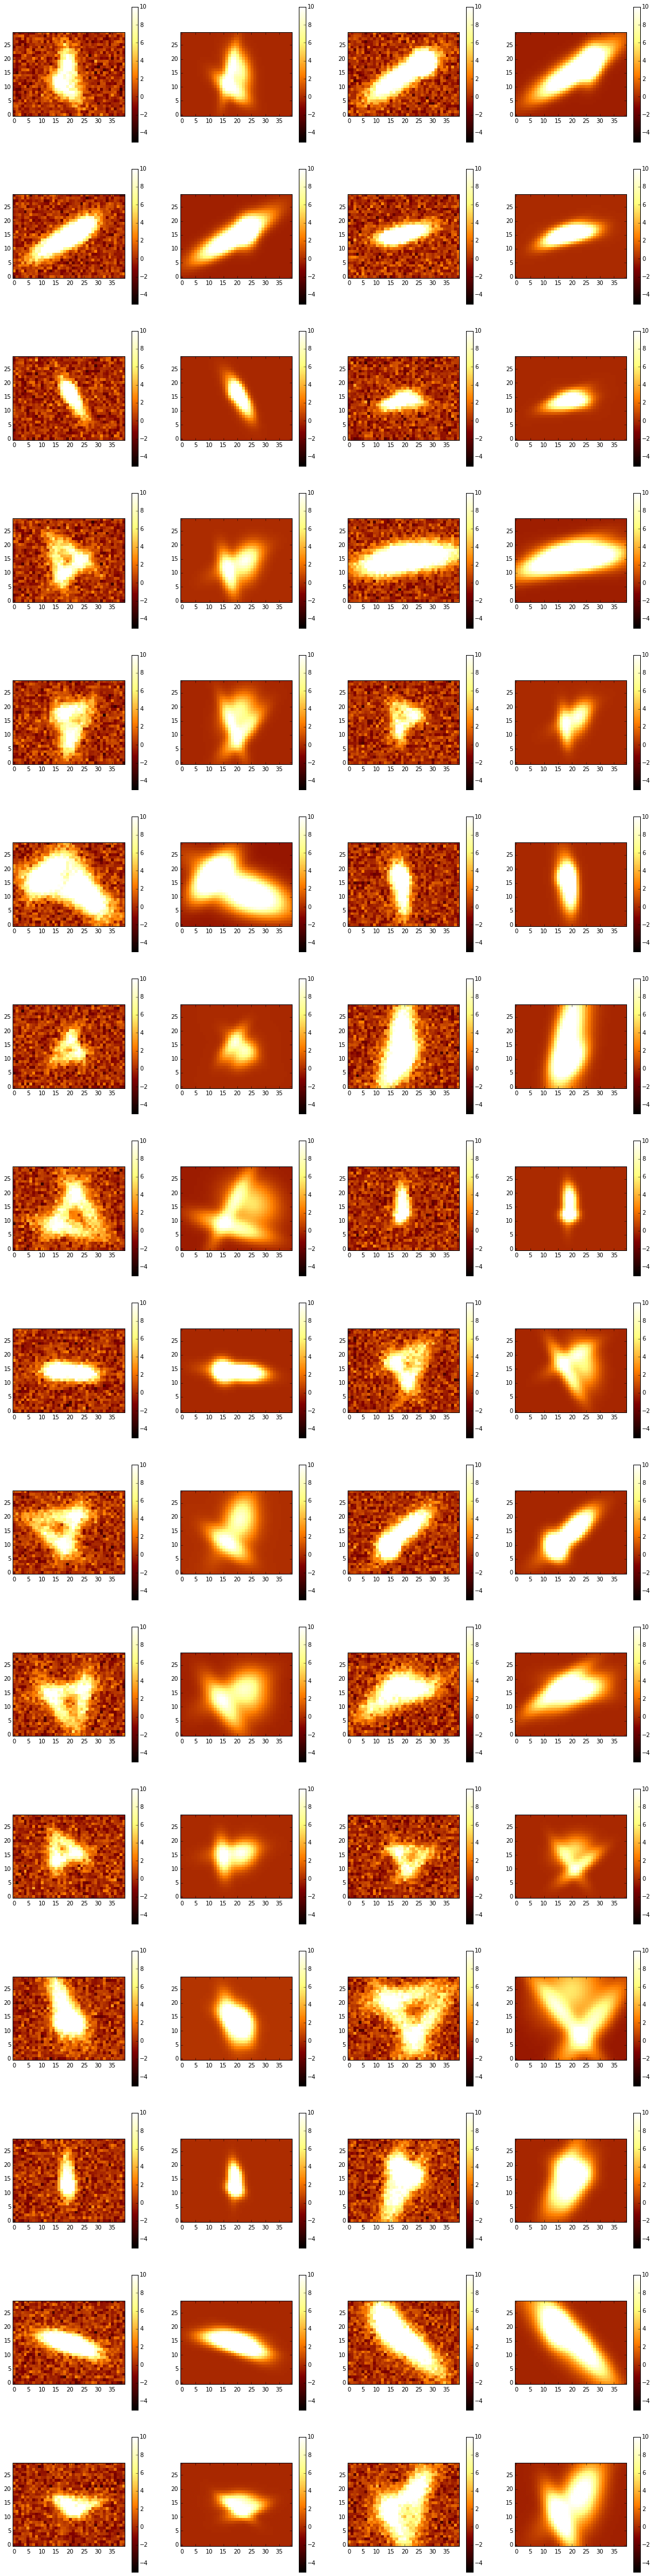

In [12]:
galpar0 = album.galaxy.get_parameters_vector()
print "album before", album(galpar0)
result = op.minimize(album, galpar0, method="Powell")
#print result
galpar = result['x']
print "album after", album(galpar)
showme(album)

image before 1502.34954098
image after 1467.96205655
image before 4234.63026953
image after 3867.65863507
image before 1620.94240064
image after 1336.463495
image before 1593.56479173
image after 1549.19711281
image before 1242.33796001
image after 1236.56437643
image before 1405.48486108
image after 1390.50791631
image before 2911.46884935
image after 2831.15861489
image before 1701.33117309
image after 1508.76602061
image before 2074.00366793
image after 1997.73753798
image before 1804.35535174
image after 1793.89793197
image before 5404.90356173
image after 5122.23254487
image before 1518.284938
image after 1491.33997913
image before 1581.80251257
image after 1520.691309
image before 2509.02190505
image after 2318.42732108
image before 2266.55651623
image after 2181.78658234
image before 1297.17247633
image after 1256.2162909
image before 1478.56623582
image after 1356.45829802
image before 2197.80262087
image after 2174.37449583
image before 2991.3882828
image after 2911.22032992
i

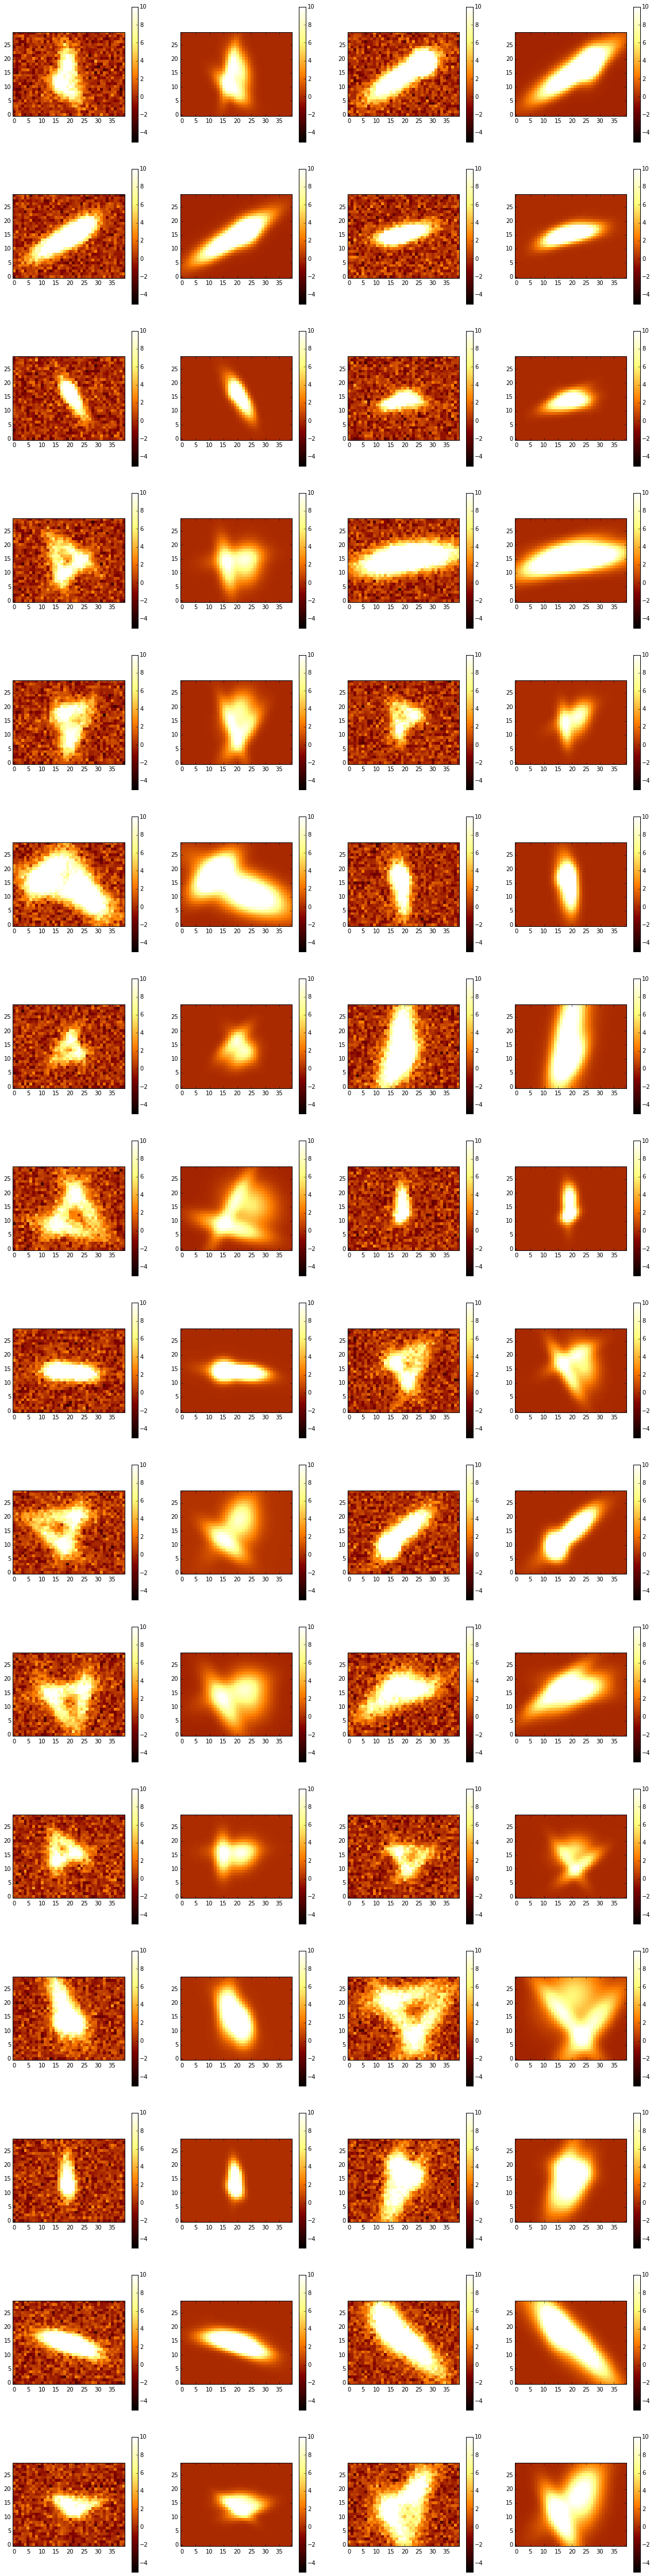

In [13]:
for image in album:
    imgpar0 = image.get_parameters_vector()
    print "image before", image(imgpar0)
    result = op.minimize(image, imgpar0)
    imgpar = result['x']
    print "image after", image(imgpar)
showme(album)

album before 65883.5156237
album after 62165.5935006


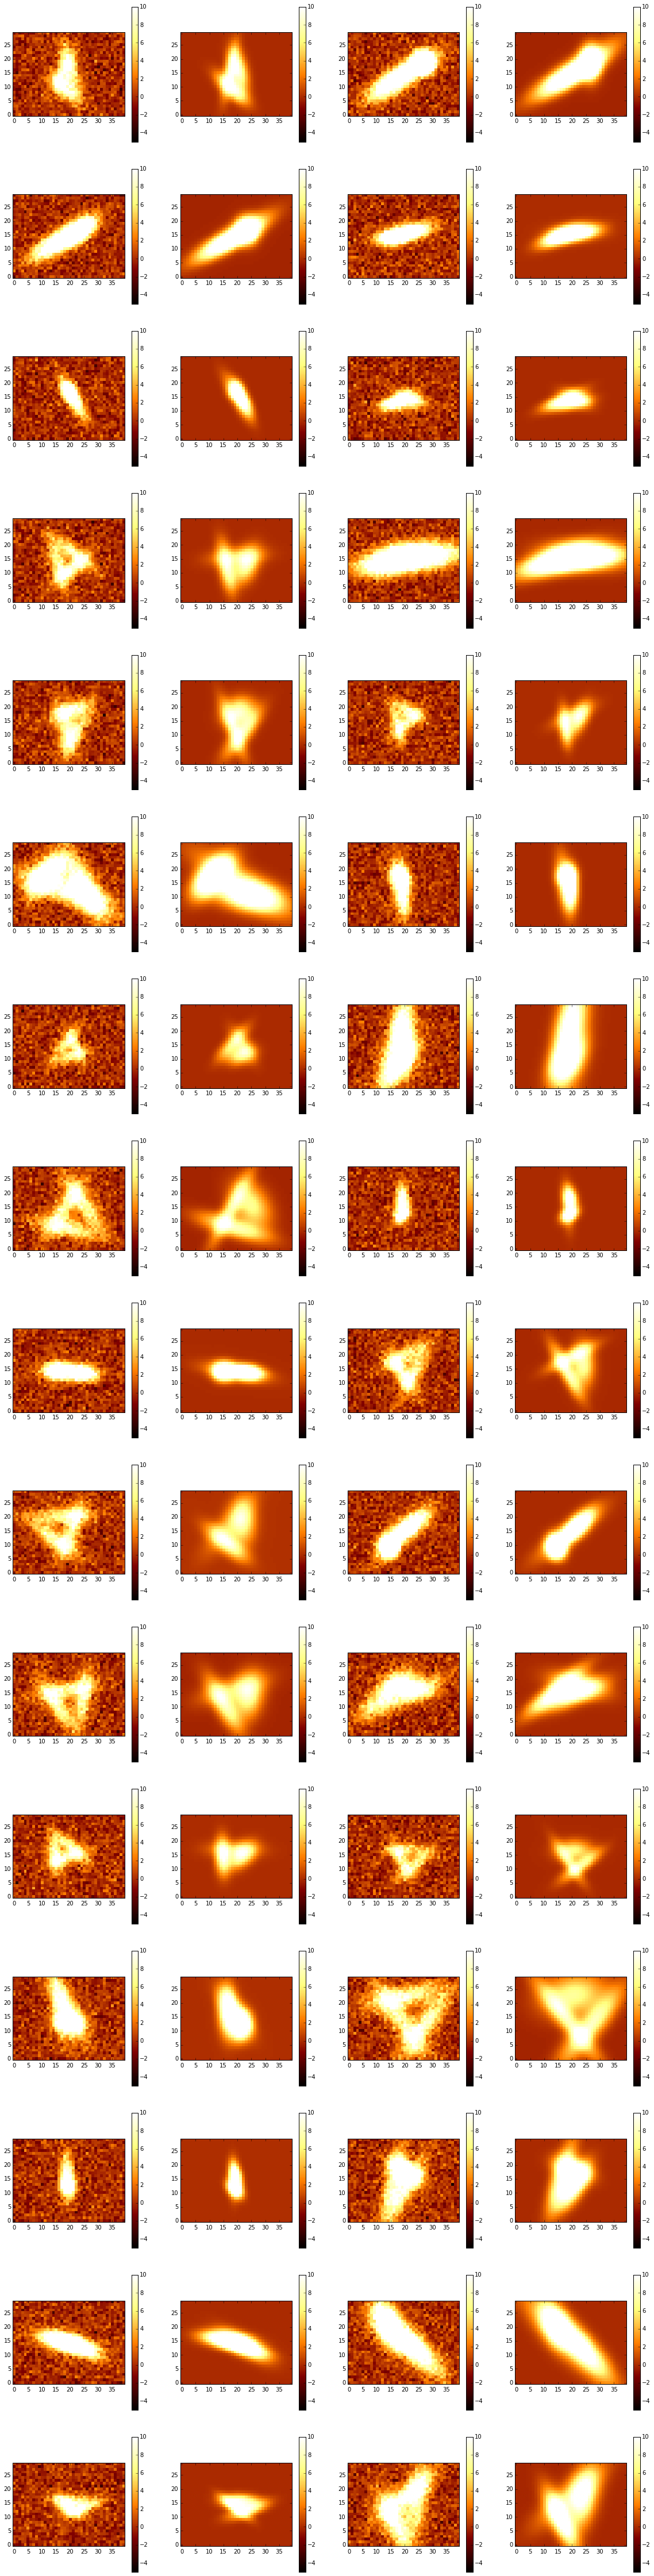

In [14]:
galpar0 = album.galaxy.get_parameters_vector()
print "album before", album(galpar0)
result = op.minimize(album, galpar0, method="Powell")
#print result
galpar = result['x']
print "album after", album(galpar)
showme(album)

image before 1366.25089086
image after 1360.8567743
image before 3414.75020698
image after 2938.89727473
image before 1688.58117466
image after 1286.39963116
image before 1646.54855611
image after 1338.64824867
image before 1251.77571399
image after 1241.95500348
image before 1338.93780054
image after 1331.74808476
image before 2717.36791263
image after 2494.93967781
image before 1729.04141588
image after 1556.95056511
image before 1694.08577445
image after 1655.84610364
image before 1834.46238019
image after 1794.09037557
image before 5488.01679684
image after 5195.12297242
image before 1472.47528345
image after 1419.44528075
image before 1388.8298044
image after 1378.21632163
image before 2471.87610191
image after 1634.16699136
image before 1752.70583876
image after 1742.00029323
image before 1291.43178474
image after 1272.80221698
image before 1327.15182478
image after 1285.19311898
image before 1988.89932822
image after 1976.69478108
image before 2925.87748593
image after 2739.2321

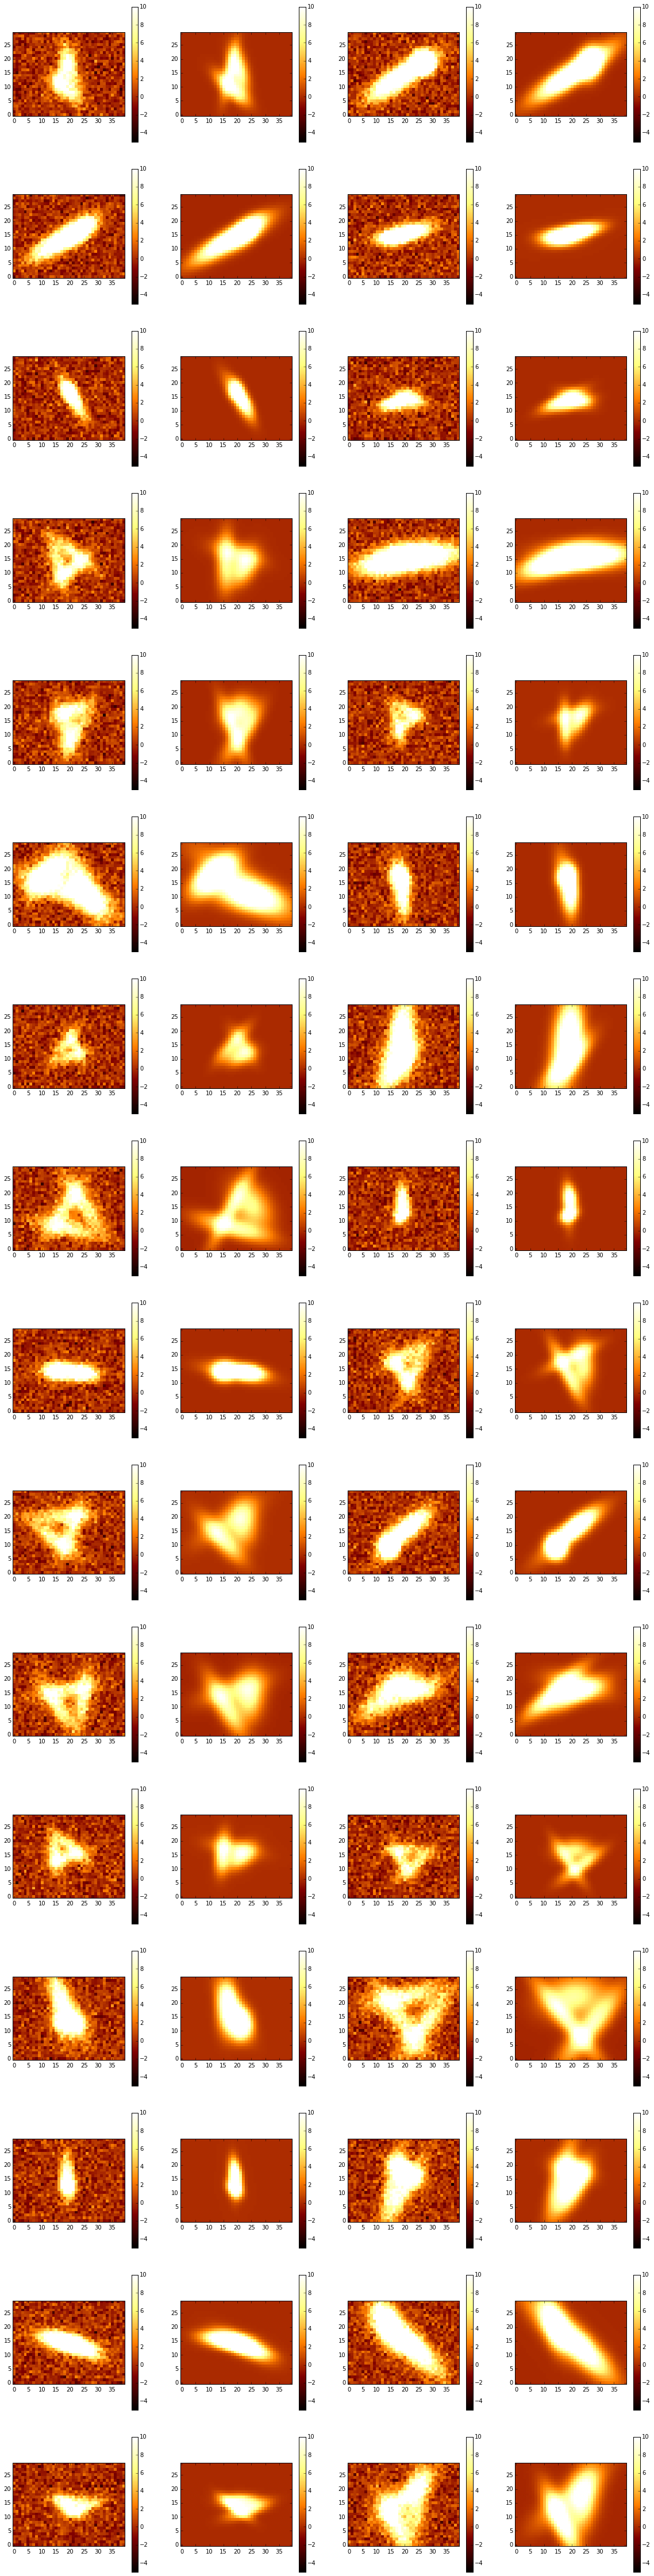

In [15]:
for image in album:
    imgpar0 = image.get_parameters_vector()
    print "image before", image(imgpar0)
    result = op.minimize(image, imgpar0)
    imgpar = result['x']
    print "image after", image(imgpar)
showme(album)

album before 57921.5754759
album after 55136.8379601


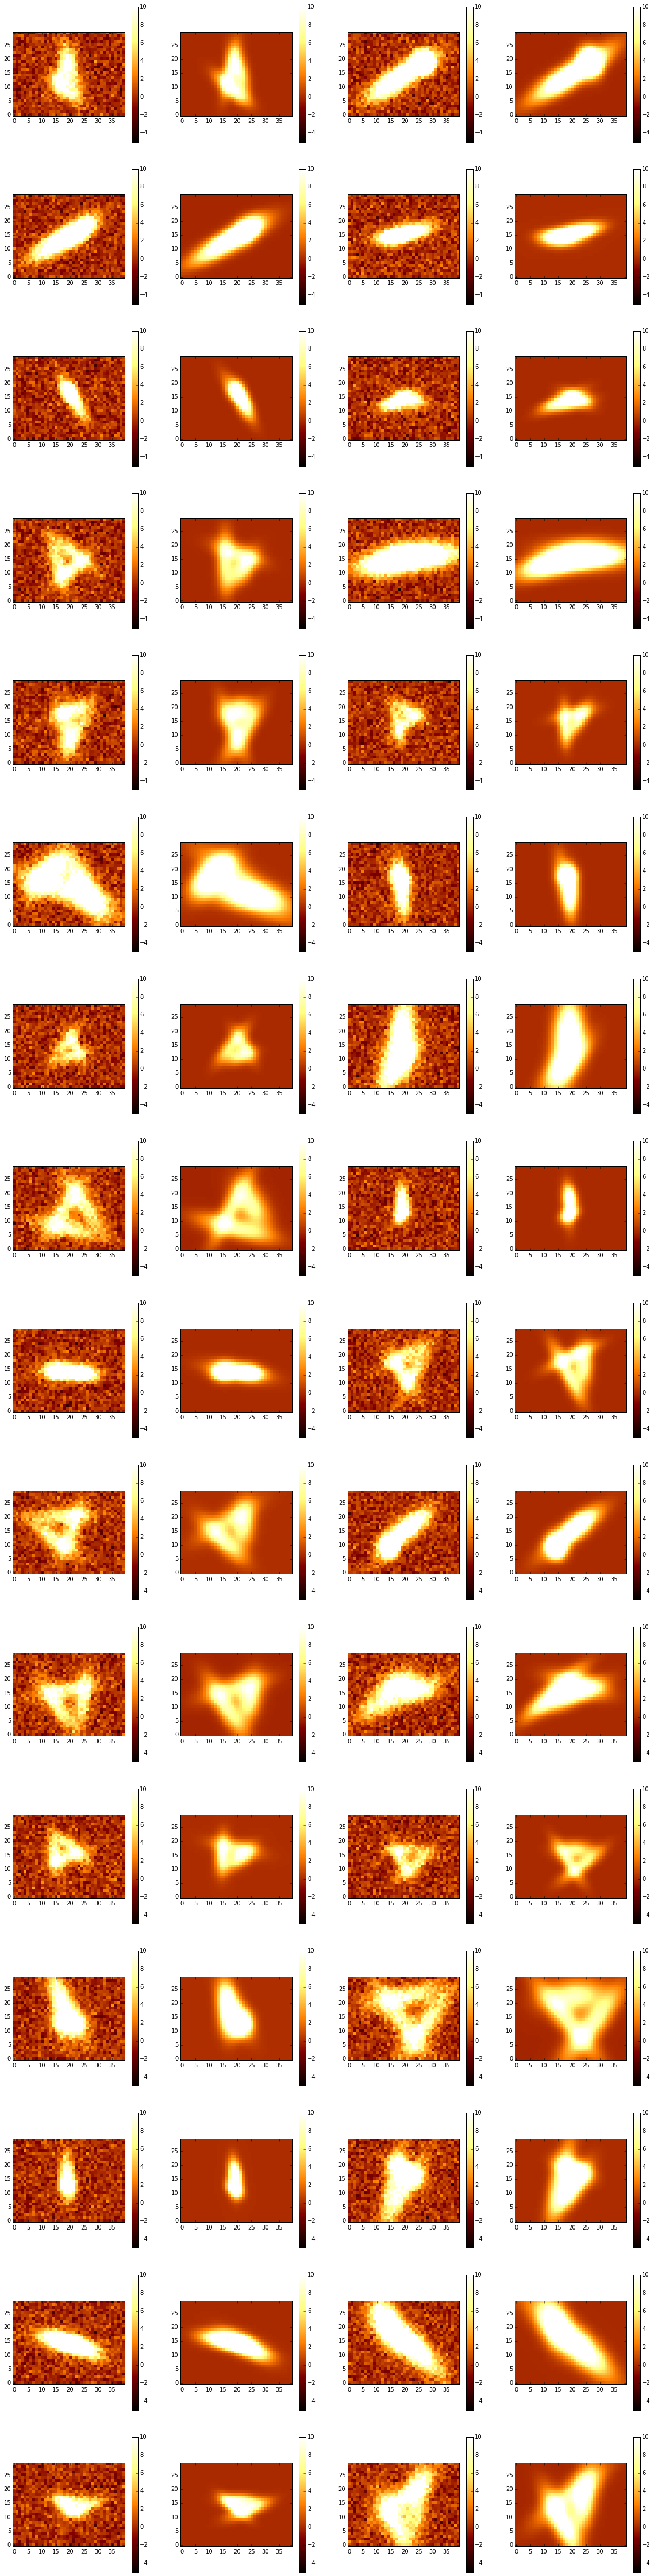

In [16]:
galpar0 = album.galaxy.get_parameters_vector()
print "album before", album(galpar0)
result = op.minimize(album, galpar0, method="Powell")
#print result
galpar = result['x']
print "album after", album(galpar)
showme(album)

image before 1323.4657652
image after 1319.59619833
image before 2255.72987374
image after 2155.77377456
image before 1430.37649783
image after 1214.84239775
image before 1369.94633779
image after 1330.02336312
image before 1252.32123463
image after 1242.03186379
image before 1328.0999931
image after 1322.77469564
image before 2217.35463725
image after 2174.90445843
image before 1709.90792798
image after 1596.33430249
image before 1507.05338583
image after 1484.89345193
image before 1807.78030806
image after 1663.56451424
image before 5242.77504149
image after 5015.41726404
image before 1387.64916506
image after 1358.92346279
image before 1325.50626198
image after 1319.42246665
image before 1565.28144399
image after 1485.14333072
image before 1543.27200653
image after 1534.4152901
image before 1261.96522433
image after 1254.22300262
image before 1313.65628749
image after 1298.01508716
image before 1968.27625765
image after 1951.93065162
image before 2597.57906348
image after 2450.56574

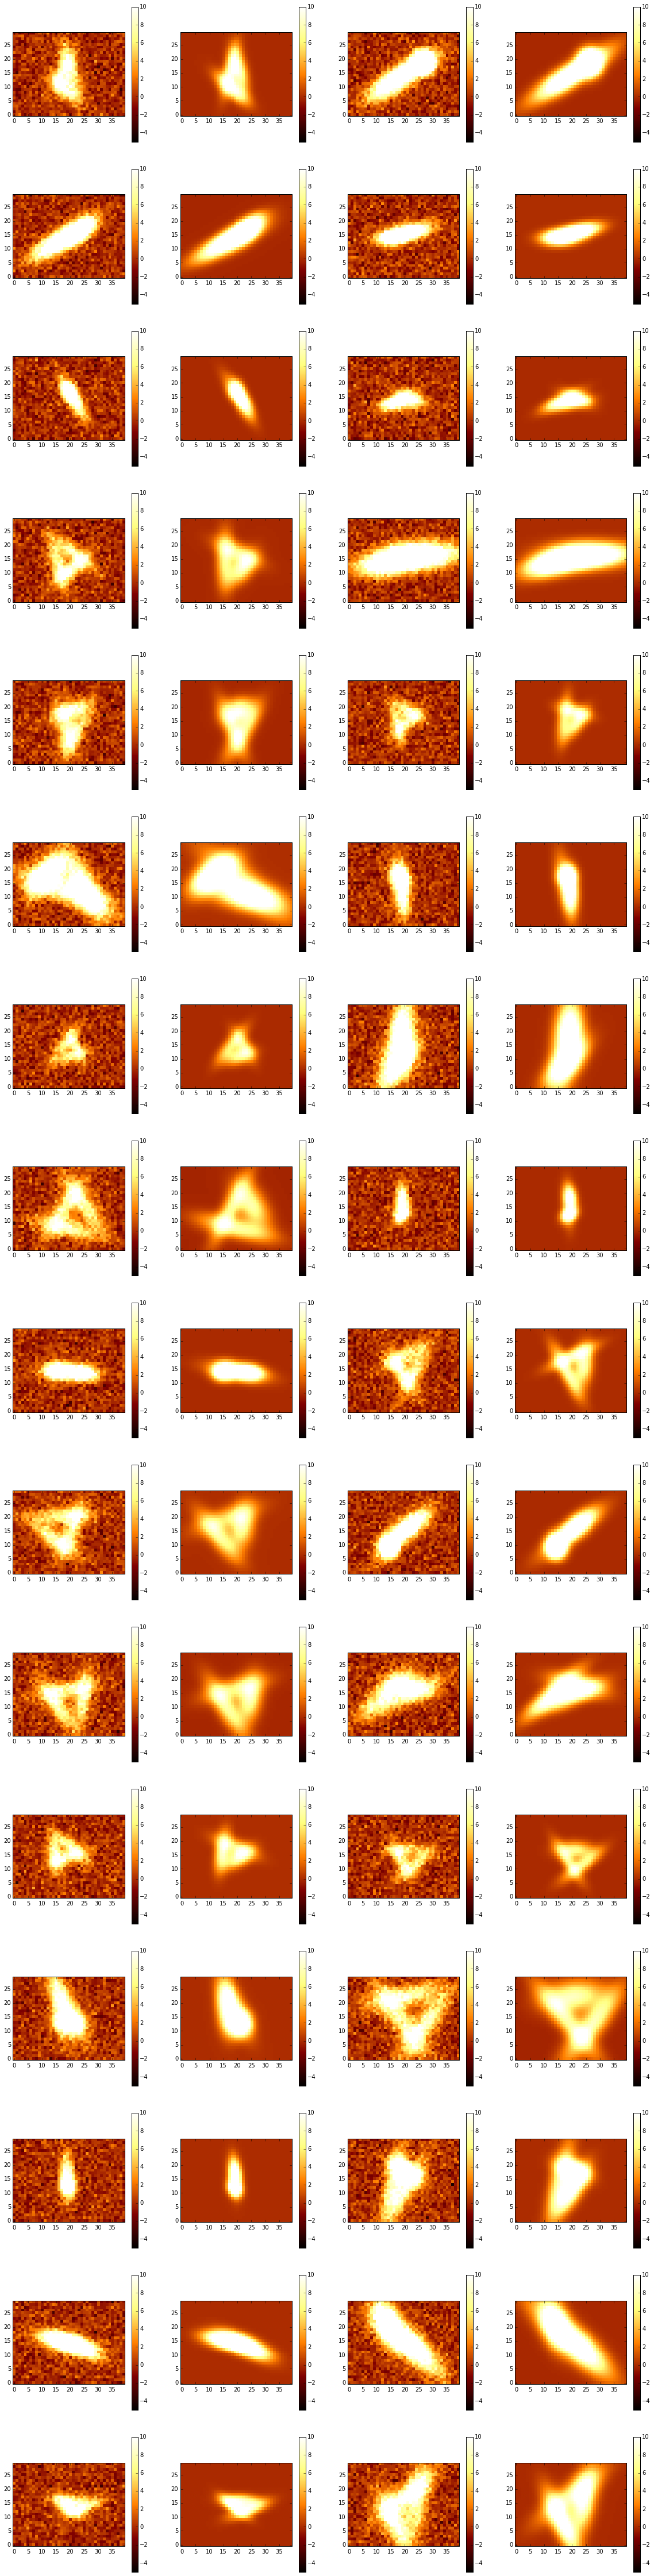

In [18]:
for image in album:
    imgpar0 = image.get_parameters_vector()
    print "image before", image(imgpar0)
    result = op.minimize(image, imgpar0)
    imgpar = result['x']
    print "image after", image(imgpar)
showme(album)

album before 53361.7154968
album after 52059.7447078


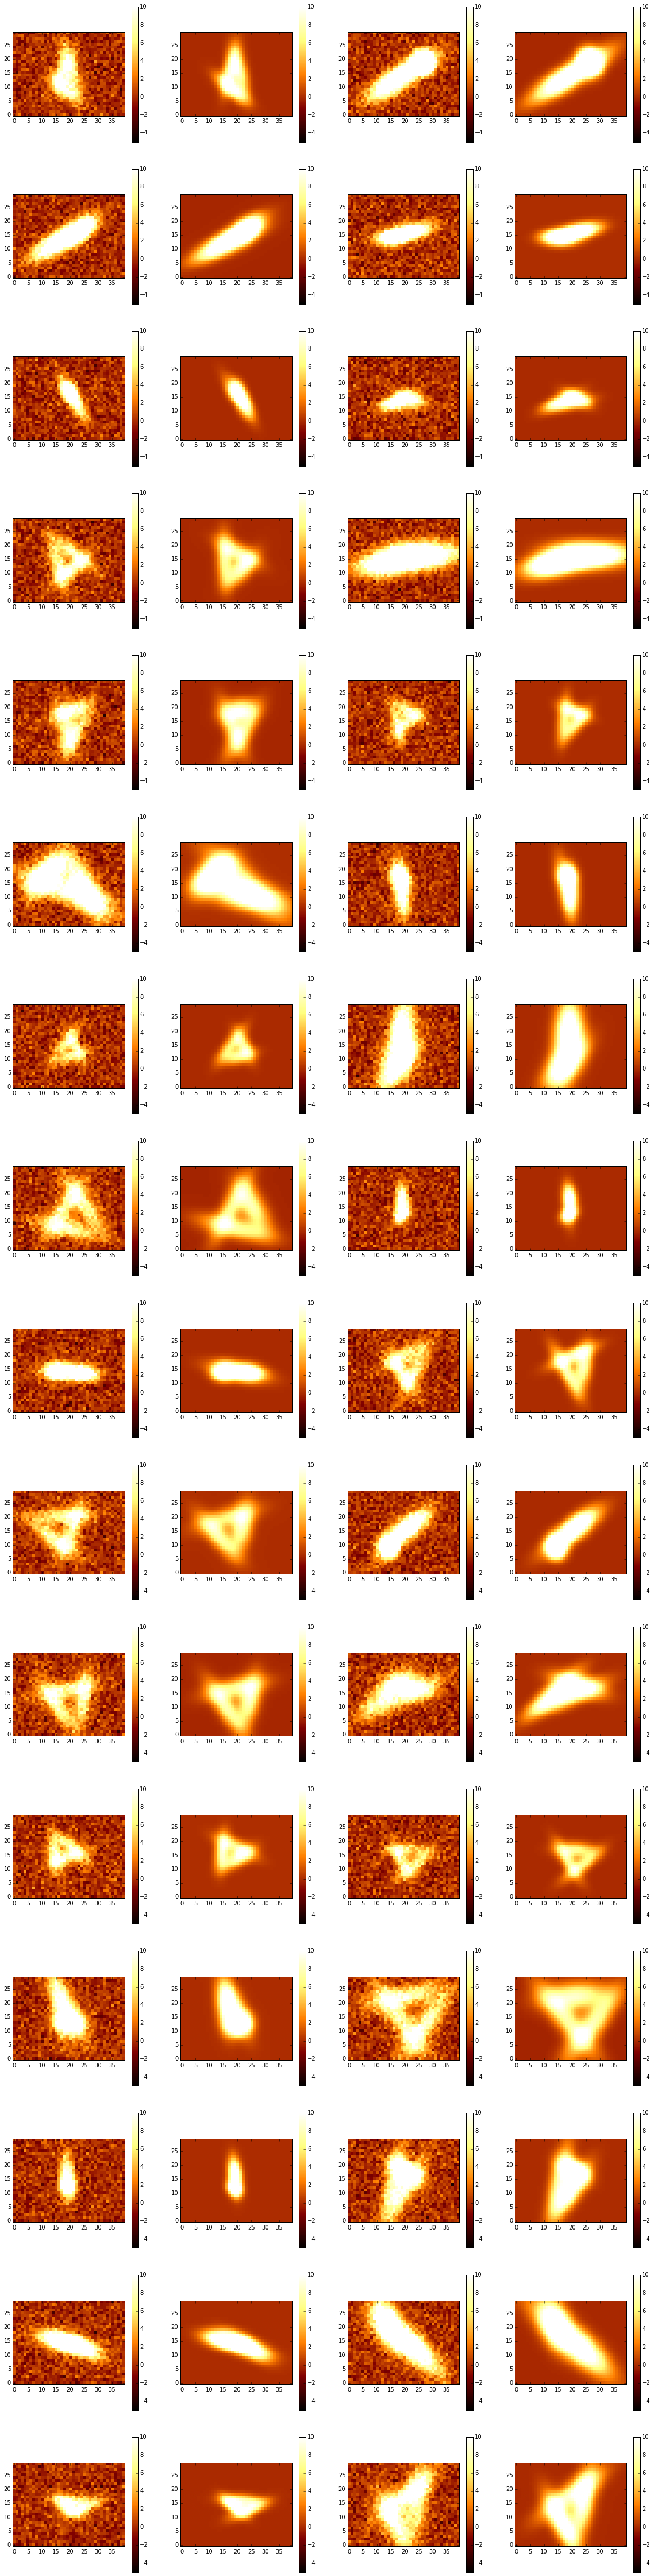

In [19]:
galpar0 = album.galaxy.get_parameters_vector()
print "album before", album(galpar0)
result = op.minimize(album, galpar0, method="Powell")
#print result
galpar = result['x']
print "album after", album(galpar)
showme(album)

In [20]:
print result

  status: 0
 success: True
   direc: array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00